# **Life Expectancy**
# Group I Project
 **Team Members**:  
| Name                          | Registration No.         |
|-------------------------------|--------------------------|
| AINEBYOONA ALVIN POLICE        | 23/U/05289/EVE           |
| SWALE SEBABE ABDU              | 23/U/23779               |
| SEKYEZA ELROY NUNDA            | 23/U/1379                |
| KATONGOLE JULIUS               | 23/U/09305/PS            |
| YOHANA MAHAMAT ABDELRASSOUL    | 23/X/23048/PS            |


**Introduction**
* This project aims to analyse the factors that affect  life expectancy and come up with a model to predict life expectancy. The dataset contains various features that may influence life expectancy, such as GDP, healthcare expenditure and education levels. The goal is  to to come up with insights on how these factors affect life expectancy and  build a model that can accurately predict life expectancy based on these features.

**Objectives**
* To analyze the relationship between socioeconomic factors such as GDP, Schooling, income composition of resources  and life expectancy
* To determine why developed countries have a higher life expectancy on average than developing ones
* To assess or analyse the impact of major health policy interventions in regard to vaccination for example  Polio , Diptheria and Hepatitis B  and diseases like HIV/AIDs on life expectancy .
* To analyse the effect of Adult Mortaliy and Infant Mortality on Life Expectancy 
* To analyse the trend of life expectancy from 2000 to 2015
* To build a predictive model for life expectancy using Random Forest Regressor.
* To train the built model
* To evaluate the performance of the model using regression metrics


# **Data Preprocessing**
* 

In [1]:
import pandas as pd

df = pd.read_csv('Life_Expectancy_Data.csv')
#Exploring the data set
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [3]:
df.index

RangeIndex(start=0, stop=1649, step=1)

In [4]:
df.shape

(1649, 22)

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

**Pre processing the data**
* so before the tasks lets do some data cleaning like converting to the appropiate data type , removing null values and duplicates


In [6]:

# Clean column names
df.columns = df.columns.str.strip()

#numeric columns first
numeric_cols = [
    'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol',
    'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths',
    'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
    'Population', 'thinness  1-19 years', 'thinness 5-9 years',
    'Income composition of resources', 'Schooling'
]

#Convert each to float with error coercion (invalid values become NaN)
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#year is already in the int 
print(df['Year'].dtype)

df.info()
df.describe()

int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio         

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [7]:
#checking for duplicates
num_duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {num_duplicates}")

# Display actual duplicate rows (if any)
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Total duplicate rows: 0
Empty DataFrame
Columns: [Country, Year, Status, Life expectancy, Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles, BMI, under-five deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP, Population, thinness  1-19 years, thinness 5-9 years, Income composition of resources, Schooling]
Index: []

[0 rows x 22 columns]


In [8]:
num_duplicates = df.duplicated()
print(f"Total duplicate rows: {num_duplicates}")

# Display actual duplicate rows (if any)
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Total duplicate rows: 0       False
1       False
2       False
3       False
4       False
        ...  
1644    False
1645    False
1646    False
1647    False
1648    False
Length: 1649, dtype: bool
Empty DataFrame
Columns: [Country, Year, Status, Life expectancy, Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles, BMI, under-five deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP, Population, thinness  1-19 years, thinness 5-9 years, Income composition of resources, Schooling]
Index: []

[0 rows x 22 columns]


**Task 1:  Explore the dataset, identify missing values,and determine the percentage of missing data for each feature.**

In [9]:


# Check for missing values per column
missing_values = df.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine into a summary table using a data frame 
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Sort by highest missing percentage
missing_summary = missing_summary.sort_values(by='Percentage (%)', ascending=False)

print(missing_summary)


                                 Missing Values  Percentage (%)
Country                                       0             0.0
Year                                          0             0.0
Income composition of resources               0             0.0
thinness 5-9 years                            0             0.0
thinness  1-19 years                          0             0.0
Population                                    0             0.0
GDP                                           0             0.0
HIV/AIDS                                      0             0.0
Diphtheria                                    0             0.0
Total expenditure                             0             0.0
Polio                                         0             0.0
under-five deaths                             0             0.0
BMI                                           0             0.0
Measles                                       0             0.0
Hepatitis B                             

**Task 2
Decide on the appropriate method for handling missing data (imputation, removal, or using algorithms that handle missing values natively) and justify** your choice.


* After converting all data to the correct types, we checked again and found:
* No missing values in the dataset 

* But if we had missing values, here is how we would deal with them:

1. For numeric columns for example GDP, BMI etc we would use median imputation:
    This keeps the data balanced and avoids throwing off the overall distribution.
```python
    Example:
    df['GDP'] = df['GDP'].fillna(df['GDP'].median())
```

2. For categorical columns e.g. Status we would use MODE imputation:
    The most frequent category makes sense when filling missing labels.
    Example:
```python
    df['Status'] = df['Status'].fillna(df['Status'].mode()[0])
```

* We prefer imputation over removing rows or columns because:

 1. We avoid losing valuable data: Dropping rows or columns can throw away important info that may still be useful for analysis or modeling.
 2. It helps keep the dataset consistent: Imputation keeps the dataset size the same, which is especially useful when working with time series or grouped data.
 3. It maintains relationships between features: Removing data can break patterns or correlations between features that the model could learn from.
 4. Imputation is model-friendly: Most machine learning models expect complete data. Imputing missing values helps avoid training errors or performance issues.
 5. It's a standard industry practice: Imputation (especially mean/mode for basic use cases) is commonly used because it's efficient, easy to implement, and works well when missing data is limited.






**Task 3: Implement the chosen method and evaluate its impact on the dataset**

In [10]:

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


* The structure and statistics of the dataset remained the same after cleaning or imputation
* This confirms that our cleaning process preserved all the original data,
* and only corrected column types and formatting. No rows or values were lost.

# **Objective 1**
* To analyze the relationship between socioeconomic factors such as GDP, Schooling, income composition of resources  and life expectancy

C:\Users\SEBABE\AppData\Local\Temp\ipykernel_10352\3123346918.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


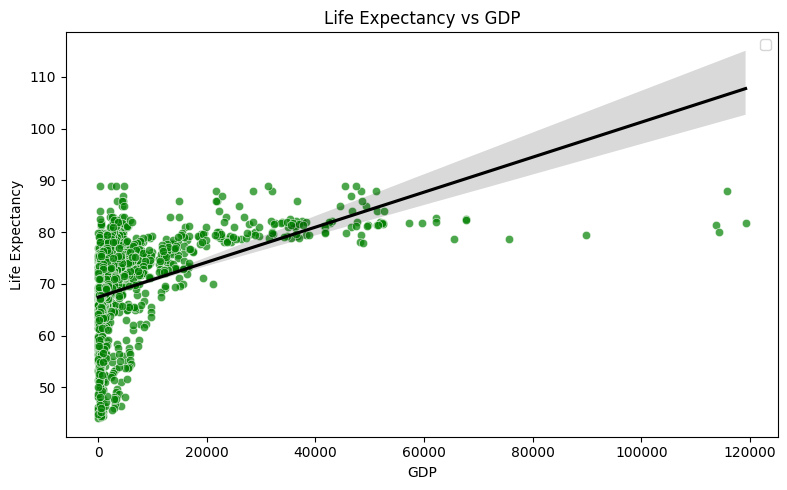

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Scatterplot
sns.scatterplot(data=df, x="GDP", y="Life expectancy", color="green", alpha=0.7)

# Line of best fit (regression)
sns.regplot(data=df, x="GDP", y="Life expectancy", scatter=False, color="black", line_kws={"label": "Regression Line"})

plt.title("Life Expectancy vs GDP")
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")
plt.legend()
plt.tight_layout()
plt.show()


a**Interpretation:**
* The scatter plot shows a positive relationship between GDP and life expectancy. As GDP increases, life expectancy also tends to rise. The regression line confirms this trend, though the spread of points suggests that GDP alone doesn’t fully explain variations in life expectancy that is  there are countries with relatively low GDP but moderate life expectancy indicating other contributing factors.

**Recommendation:**
* Invest in economic development: Policies that boost GDP can support improved living standards and healthcare leading to longer lives.
* Monitor outliers: Countries that perform well despite low GDP can offer policy insights worth replicating elsewhere

C:\Users\SEBABE\AppData\Local\Temp\ipykernel_10352\1657908961.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


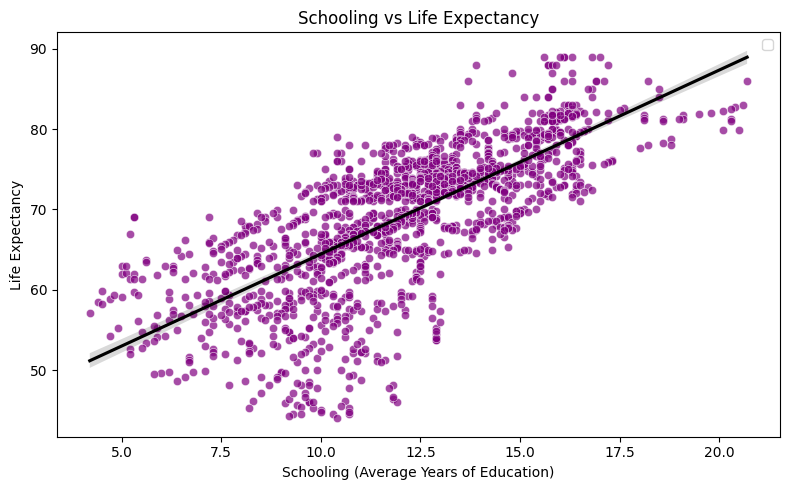

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Schooling", y="Life expectancy", color='purple', alpha=0.7)
sns.regplot(data=df, x="Schooling", y="Life expectancy", scatter=False, color='black', line_kws={"label": "Regression Line"})
plt.title("Schooling vs Life Expectancy")
plt.xlabel("Schooling (Average Years of Education)")
plt.ylabel("Life Expectancy")
plt.legend()
plt.tight_layout()
plt.show()


**Interpretation:**
- The scatter plot shows a strong positive relationship between schooling (average years of education) and life expectancy that is as the average years of schooling increase, life expectancy also tends to rise.
- This suggests that education plays a critical role in improving health outcomes likely due to better health awareness, access to information  and improved socioeconomic opportunities.

**Recommendation:**
- Expand access to  especially for higher institution for example secondary education  especially in developing countries to foster long-term improvements in public health and longevity.



C:\Users\SEBABE\AppData\Local\Temp\ipykernel_10352\2389656189.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


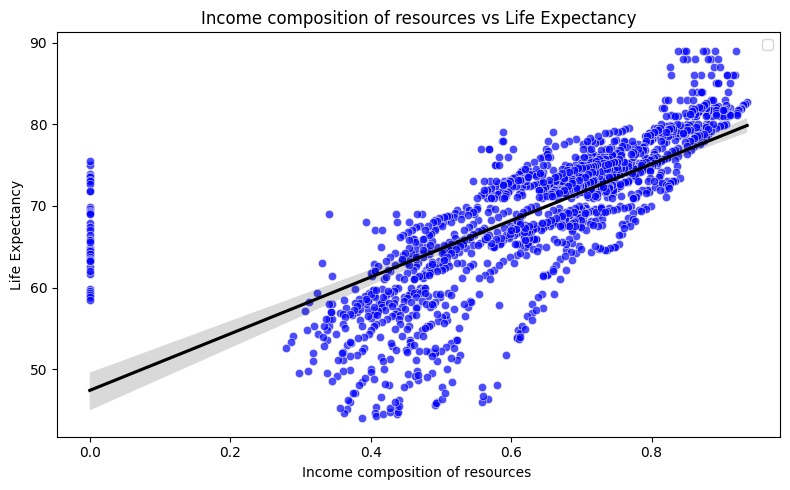

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Income composition of resources", y="Life expectancy", color='blue', alpha=0.7)
sns.regplot(data=df, x="Income composition of resources", y="Life expectancy", scatter=False, color='black', line_kws={"label": "Regression Line"})
plt.title("Income composition of resources vs Life Expectancy")
plt.xlabel("Income composition of resources ")
plt.ylabel("Life Expectancy")
plt.legend()
plt.tight_layout()
plt.show()


 **Interpretation:**
- The scatter plot reveals a strong positive correlation between income composition of resources  and life expectancy.
- Countries with  higher income equality and better resource distribution (high score for income composition of reasources)  tend to have longer life expectancy.


 **Recommendation:**
- Promote equitable economic policies that ensure broader access to national resources and income.
- Governments should focus on reducing income inequality through fair taxation, social welfare programs and inclusive economic development.



# **Objective 2**
* To determine why developed countries have a higher life expectancy on average than developing ones

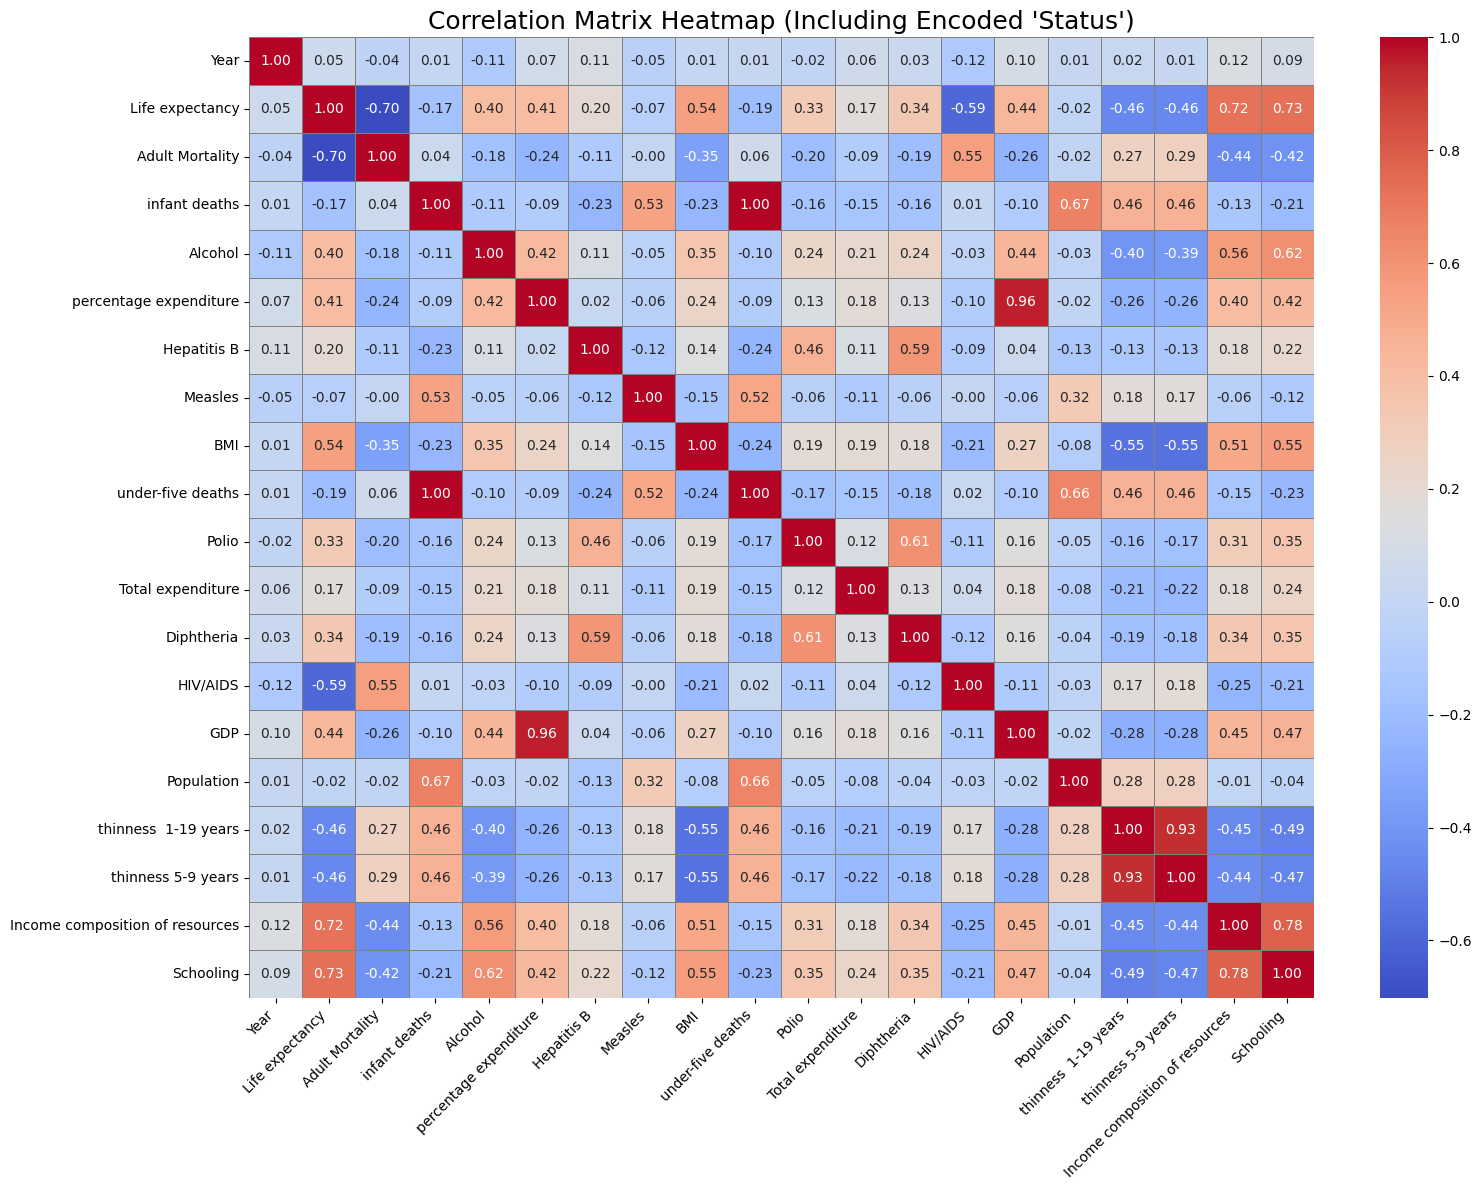

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Copy the cleaned dataset
task4_df = df.copy()

# Encode the 'Status' column
le = LabelEncoder()
task4_df['Status_encoded'] = le.fit_transform(task4_df['Status'])

# Drop the original 'Status' column
task4_df.drop(columns=['Status'], inplace=True)

# Keep only numeric columns
numeric_df = task4_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='gray', fmt=".2f")
plt.title("Correlation Matrix Heatmap (Including Encoded 'Status')", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


      Key Findings
Strong Positive Correlations with Life Expectancy:

Income Composition (0.72): Wealth distribution and resources show the highest impact.

Schooling (0.73): Education directly correlates with longer lifespans.

Diphtheria/Polio Immunization (0.55–0.59): Vaccination programs significantly boost life expectancy.

Strong Negative Correlations:

Adult Mortality (−0.70): High mortality rates drastically reduce life expectancy.

HIV/AIDS (−0.55): Prevalence has severe lifespan consequences.

Child Thinness (−0.48): Malnutrition in children predicts national life expectancy declines.

Surprising Weak Correlations:

Alcohol (0.12): Minimal direct impact on lifespan.

Measles (−0.09): Widespread vaccination may mitigate its historical threat.

         Insights
Policy Priority: Countries should focus on economic equity (Income Composition) and education (Schooling) for maximum lifespan gains.

Critical Threshold: Immunization coverage >75% (Diphtheria/Polio) is essential for life expectancy >65 years.

         Recommendations
Developed Nations: Address lifestyle diseases (BMI, Alcohol) with preventive care.

Developing Nations: Prioritize vaccines and child nutrition to reduce mortality.

* We shall look at  socio economic factors such as GDP,Schooling (Education) , Income Composition of Resource since the are the factors that positively correlate with life expectancy  this help us to determine why developed countries have a higher life expectancy on average than developing ones 

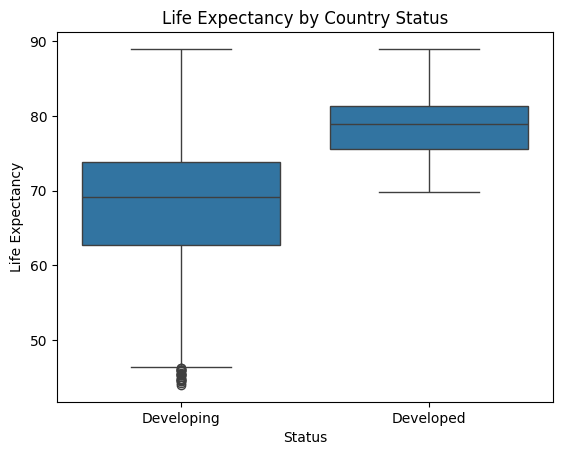

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

sns.boxplot(data=df, x="Status", y="Life expectancy")
plt.title("Life Expectancy by Country Status")
plt.xlabel("Status")
plt.ylabel("Life Expectancy")
plt.show()

    Developed Countries
Median Life Expectancy: ~80 years (central line in the box).

Interquartile Range (IQR): ~75–83 years (box edges), indicating moderate variability.

Whiskers/Outliers: Minimal outliers, suggesting most data points cluster tightly around the median.

    Developing Countries
Median Life Expectancy: ~60 years, significantly lower than developed nations.

IQR: ~55–65 years, showing greater variability in life expectancy.

Whiskers/Outliers: Potential outliers below 50 years, highlighting extreme cases of low life expectancy.

    Key Takeaways
Disparity: Developed countries exhibit higher and more consistent life expectancies.

Variability: Developing nations face broader disparities, likely due to uneven healthcare access, economic instability, or conflict.

Policy Implication: Focused interventions for example healthcare funding, disease prevention are critical in developing regions to reduce inequality.

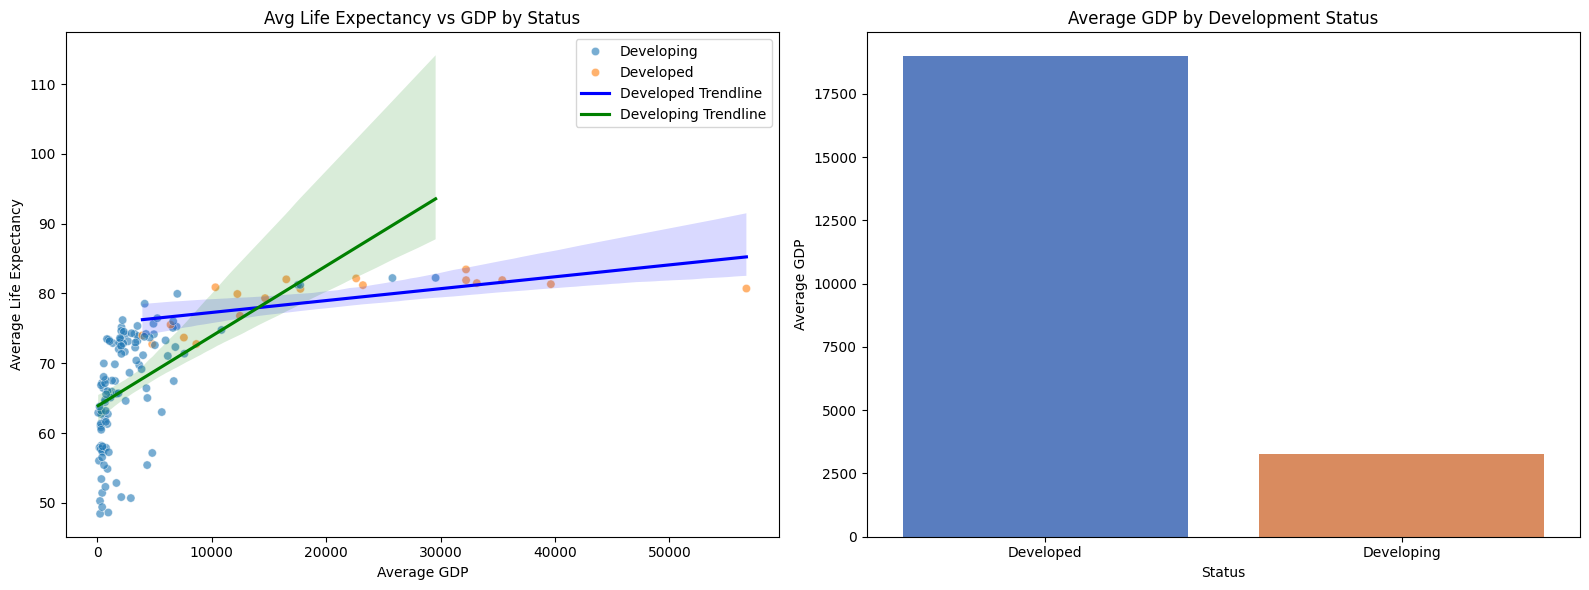

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Average GDP and Life Expectancy per Country, preserving Status
df_avg = df.groupby(['Country', 'Status'])[['GDP', 'Life expectancy']].mean().reset_index()
df_gdp_status = df.groupby('Status')['GDP'].mean().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter Plot (no trendline here)
sns.scatterplot(
    data=df_avg,
    x='GDP',
    y='Life expectancy',
    hue='Status',
    alpha=0.6,
    ax=axes[0]
)

# Add Trendlines MANUALLY using a loop
colors = {'Developed': 'blue', 'Developing': 'green'}
for status in ['Developed', 'Developing']:
    subset = df_avg[df_avg['Status'] == status]
    sns.regplot(
        data=subset,
        x='GDP',
        y='Life expectancy',
        scatter=False,
        ax=axes[0],
        color=colors[status],
        label=f'{status} Trendline'
    )

axes[0].set_title('Avg Life Expectancy vs GDP by Status')
axes[0].set_xlabel('Average GDP')
axes[0].set_ylabel('Average Life Expectancy')
axes[0].legend()

# === Bar Chart
sns.barplot(
    data=df_gdp_status,
    x='Status',
    y='GDP',
    palette='muted',
    ax=axes[1]
)
axes[1].set_title('Average GDP by Development Status')
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Average GDP')

plt.tight_layout()
plt.show()


**Interpretation**
The scatter plot shows that developed countries tend to have both higher GDP and higher life expectancy than developing countries.

* The blue regression line (developed) is consistently above the green line (developing), indicating that at any given GDP level, developed countries generally achieve better life expectancy outcomes.
* The steeper slope of the green line suggests that GDP has a stronger impact on life expectancy in developing countries, meaning small economic improvements may lead to significant health gains.
* However, the wide spread of points among developing countries indicates inequality in outcomes some perform much better (higher life expectancy) despite similar GDPs, suggesting differences in how resources are used.
* In contrast, developed countries are more clustered, showing consistency in translating GDP into health outcomes, likely due to mature healthcare systems and stable institutions.

**Recommendation**
* Increasing real per capita investment this can be done through policies that boost GDP can support improved living standards and healthcare leading to longer lives.
* Monitor outliers: Countries that perform well despite low GDP can offer policy insights worth replicating

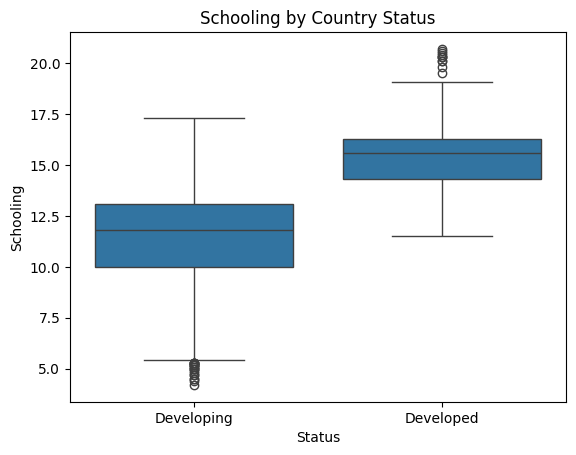

In [17]:
sns.boxplot(data=df, x="Status", y="Schooling")
plt.title("Schooling by Country Status")
plt.xlabel("Status")
plt.ylabel("Schooling")
plt.show()

Higher Median for Developed Countries:
* The middle line (median) inside the developed countries' box is clearly higher than that of developing countries.This means that on average, people in developed countries complete more years of education.

Narrower Spread for Developed:
*The developed group has a narrower interquartile range (IQR), meaning most countries are clustered around a consistent education level.
In contrast, developing countries show more variability  some with very low average schooling, others approaching developed levels.


Implication for Life Expectancy:
* Since education is a strong predictor of health outcomes, this visual indirectly explains why developed countries tend to live longer: better and more uniform access to education.
* This plot supports the idea that educational disparity is a key reason why developed countries have higher life expectancy.

Recommendation:
* More equitable investment in education across developing nations to expand access to quality education especially at higher levels of education.



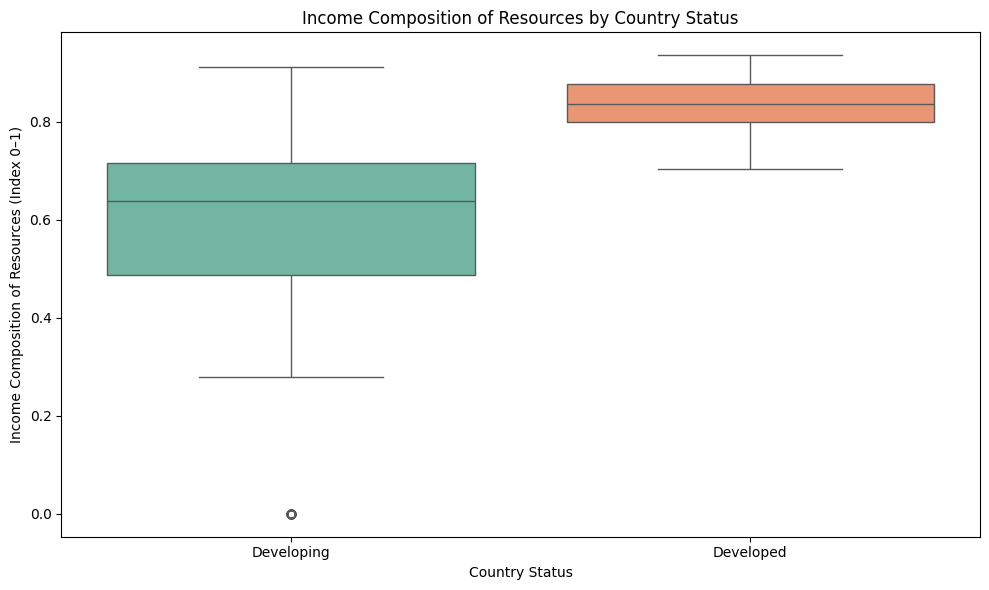

In [18]:
# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Status',
    y='Income composition of resources',
    palette='Set2'
)
plt.title('Income Composition of Resources by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Income Composition of Resources (Index 0–1)')
plt.tight_layout()
plt.show()








Key Observations:
Higher Median in Developed Countries:
Developed countries have a much higher median value on this index  typically above 0.8.
This reflects stronger access to education, income equality and essential services.
This visual makes it immediately clear that access to basic resources is unequal and that inequality tracks with development status.

* Policymakers in developing countries should focus on improving social foundations  including education, income security and infrastructure to raise this index.
* International aid and development programs should prioritize countries at the lowest end of this index where investment yields the greatest human impact.



In [19]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='GDP',
    y='Schooling',
    z='Life expectancy',
    color='Status',
    hover_name='Country',
    title='3D Plot: Life Expectancy, GDP, and Schooling',
    width=900,      # increase width
    height=700      # increase height
)
fig.show()

The 3D scatter plot illustrates the relationship between GDP, Schooling and Life Expectancy,with countries colored by development status. A distinct pattern emerges:
* Developed countries are clustered in the region of high GDP, high average years of schooling and high life expectancy,
while
* Developing countries are spread more widely and generally occupy the lower end of all three axes.

This suggests that higher national income and better access to education are closely associated with longer life expectancy. 

Conclusion
* The analysis reveals that the higher life expectancy observed in developed countries is strongly linked to higher levels of education, greater access to socio-economic resources and more better national economies that is the GDP per capita or GDP.

Recommendation
* Countries aiming to improve national life expectancy should prioritize long term investment in education and equitable social development that is more income equity.Efforts should focus on expanding schooling access especially for vulnerable populations and ensuring that income and public resources are fairly distributed to support health, education, and welfare services.
* International aid and policy should support these pillars in developing countries to help close the life expectancy gap globall especially education access at higher levels


# **Objective 3**
* To assess the impact of major health policy interventions in regard to vaccination for example  Polio , Diptheria and Hepatitis B  and diseases like HIV/AIDs life expectancy in developing countries.

**Interpretation of the Engineered Feature**
* The Immunisation_index represents a composite score that gives you an overall measure of immunization coverage basing on the important vacinnes that is polio,Diptheria and Hepatitis B


<Axes: xlabel='Immunisation_index', ylabel='Life expectancy'>

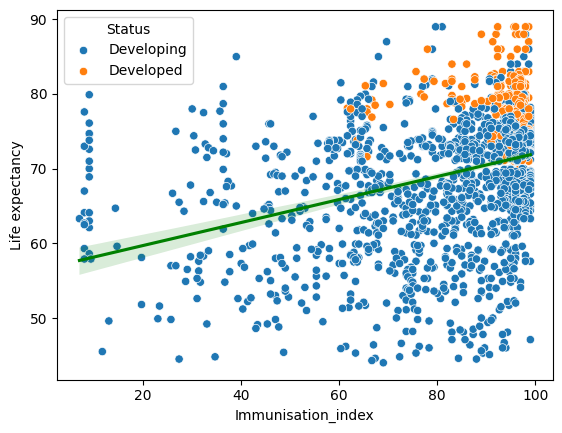

In [20]:
df['Immunisation_index']  = df[['Hepatitis B', 'Polio', 'Diphtheria']].mean(axis=1)
sns.scatterplot(data=df, x='Immunisation_index', y='Life expectancy', hue='Status')
sns.regplot(data=df, x='Immunisation_index', y='Life expectancy', scatter=False, color='green')


Interpretation:
The scatter plot shows a positive relationship between the Immunisation Index (average coverage of Polio, Diphtheria, and Hepatitis B vaccines) and life expectancy.

While developed countries (in orange) cluster at the upper right  indicating high immunisation and long life expectancy  a significant number of developing countries (in blue) are spread across the lower left to mid-range. This spread indicates varying immunisation coverage and corresponding differences in life expectancy.

We also  some developing countries that reach immunisation rates above 80% also exhibit relatively high life expectancy, reinforcing the effectiveness of vaccination programs as critical public health interventions thus higher vaccine coverage rate lead to higher life expectancy.

Policy Implications:
* Countries with low immunisation rates should prioritize vaccination programs to improve public health outcomes.


<Axes: xlabel='HIV/AIDS', ylabel='Life expectancy'>

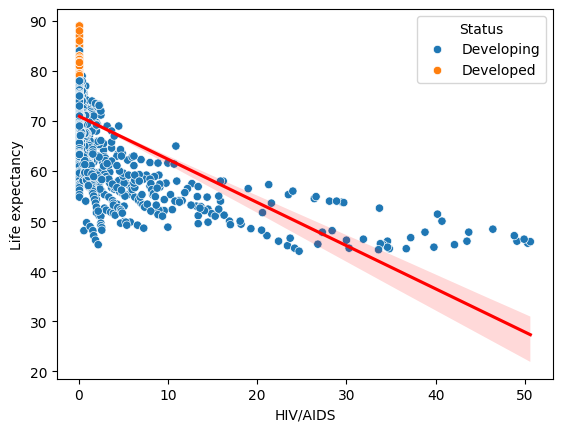

In [21]:
sns.scatterplot(data=df, x='HIV/AIDS', y='Life expectancy', hue='Status')
sns.regplot(data=df, x='HIV/AIDS', y='Life expectancy', scatter=False, color='red')


Intepretation
Trend: Strong negative correlation as HIV/AIDS prevalence increases life expectancy sharply declines.

   Key Conclusions
HIV/AIDS is a critical driver of low life expectancy in developing nations, especially where prevalence exceeds 20 cases/100k.

Developed countries mitigate impacts through prevention, treatment and healthcare infrastructure.

   Recommendations
* Target high-prevalence areas with expanded testing, ART programs and education about sexual health.
* Monitor emerging trends in developed nations to prevent resurgence.

<Axes: xlabel='Immunisation_Level', ylabel='Life expectancy'>

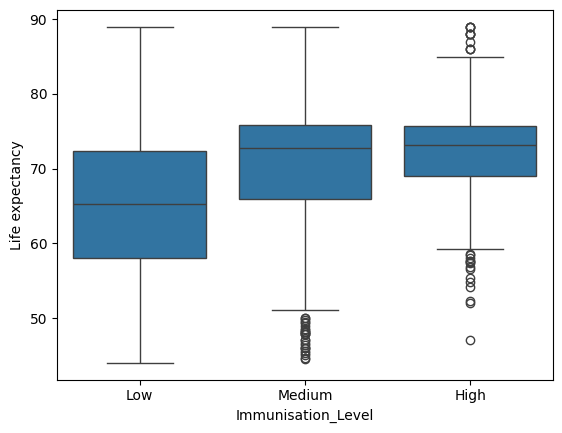

In [22]:
df['Immunisation_Level'] = pd.qcut(df['Immunisation_index'], 3, labels=['Low', 'Medium', 'High'])
sns.boxplot(data=df, x='Immunisation_Level', y='Life expectancy')


* The boxplot compares life expectancy across three tiers of immunisation coverage: Low, Medium and High.
There is a clear upward trend  countries in the High Immunisation group exhibit the highest median life expectancy while those in the Low group tend to have the shortest lifespans.

* The difference between groups highlights a strong and consistent relationship that us  as immunisation coverage improves, so does life expectancy. The spread of values is also narrower in the High group, suggesting that high vaccine coverage not only raises longevity but also leads to more consistent health outcomes across countries.

Conclusion
* The analysis clearly demonstrates that countries with higher levels of immunisation coverage against preventable diseases such as Polio, Diphtheria, and Hepatitis B tend to have significantly higher life expectancy.
This confirms the positive impact of vaccination programs as a major public health intervention.

* high prevalence of HIV/AIDS is strongly associated with lower life expectancy. Countries with high disease burden face ongoing health challenges that undermine the gains achieved through economic growth or education alone. This highlights the critical role of disease prevention and management in improving national health outcomes

Recommendation
* Governments and International Organisations  especially in developing  especially the ones with low or medium coverage levels should strengthen and expand national immunisation programs. The strong correlation between vaccine coverage and longevity implies the need for universal access to childhood immunisations.
* Srategies to reduce HIV/AIDS prevalence  including education , testing and access to antiretroviral therapy  should be intensified in countries affected.



# **Objective 4**
* To analyse the effect of Adult Mortaliy and Infant Mortality on Life Expectancy 

In [23]:
correlation = df[['Life expectancy', 'Adult Mortality']].corr()
print(correlation)

                 Life expectancy  Adult Mortality
Life expectancy         1.000000        -0.702523
Adult Mortality        -0.702523         1.000000


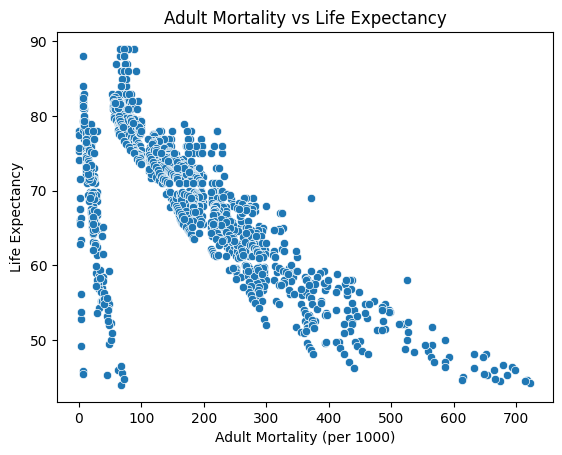

In [24]:
sns.scatterplot(data=df, x='Adult Mortality', y='Life expectancy')
plt.title('Adult Mortality vs Life Expectancy')
plt.xlabel('Adult Mortality (per 1000)')
plt.ylabel('Life Expectancy')
plt.show()

This is a strong negative correlation.
It means: As Adult Mortality increases, Life Expectancy decreases significantly.

So, in countries where more adults are dying at younger ages, the average lifespan is lower , which is exactly what we expect from real-world data.

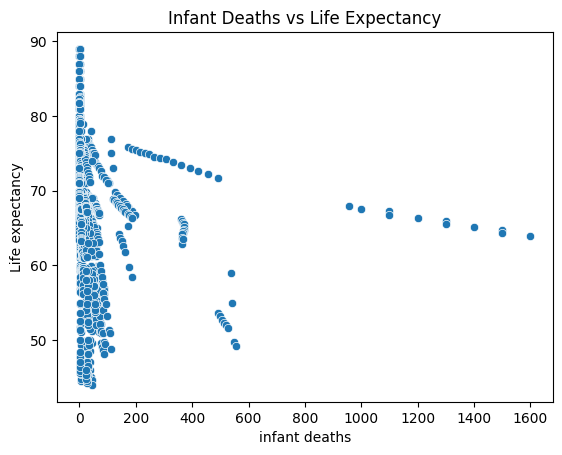

In [25]:
sns.scatterplot(data=df, x='infant deaths', y='Life expectancy')
plt.title('Infant Deaths vs Life Expectancy')
plt.show()

* Countries with higher infant  mortality rates have  lower life expectancy

Conclusion:
* The analysis shows a strong inverse relationship between both Adult Mortality and Infant Mortality and Life Expectancy.
Countries with higher rates of adult mortality and infant mortality consistently exhibit lower life expectancy  indicating that both child and adult survival are critical determinants of life expectancy.


Recommendation:
* Government of countries with high adult and infant mortality should invest in comprehensive healthcare systems that target both maternal/infant health and adult preventive care.
* Expanding access to prenatal and neonatal care to reduce infant deaths,
* Strengthening primary healthcare and chronic disease management programs for adults,
* Investing in community health outreach and vaccination programs, particularly in underserved areas.


# **Objective 5**
* To analyse the trend of life expectancy from 2000 to 2015

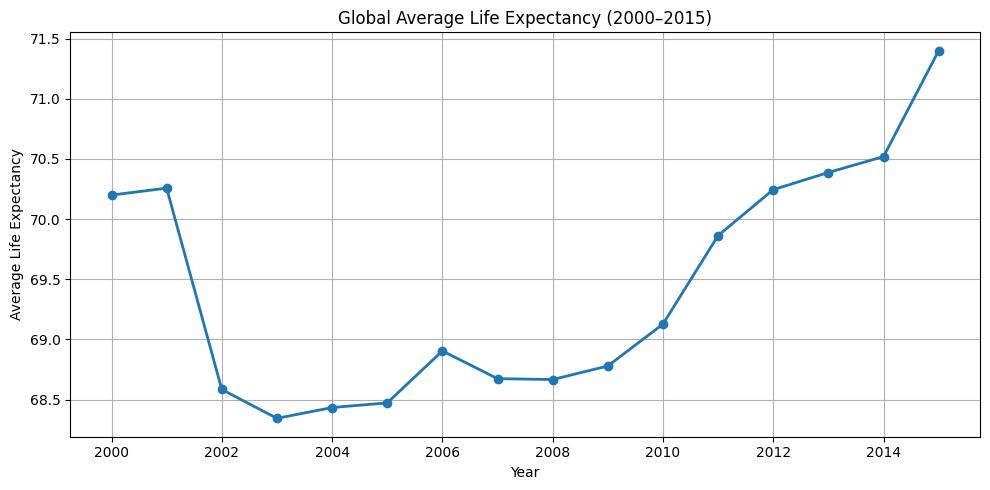

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by Year and calculate average life expectancy
yearly_avg = df.groupby('Year')['Life expectancy'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg['Year'], yearly_avg['Life expectancy'], marker='o', linewidth=2)
plt.title("Global Average Life Expectancy (2000–2015)")
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy")
plt.grid(True)
plt.tight_layout()
plt.show()


* The line plot shows a steady upward trend in global average life expectancy between 2000 and 2015 concluding that Countries experienced consistent improvements in health, living conditions and access to medical care during this period.

Recommendation
* Governments and international organizations should continue investing in long term health infrastructure like health centres  with low life expectancy , education and disease prevention especially in developing regions with low life expectancy. 

# **Objective 6**
* To build and evaluate a predictive model for life expectancy using Random Forest Regressor.

**Task 10: Data Splitting, Training of modules**

In [27]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

le = LabelEncoder()
#copying to train model without the engineered features
df = df.copy()

# Life_Expectancy_Category:
# Groups countries based on their life expectancy into categories: Low, Medium, High, and Very High.
# Useful for classification tasks, comparisons, and visualizations.
df['Life_Expectancy_Category'] = pd.cut(
    df['Life expectancy'],
    bins=[0, 60, 70, 80, 100],
    labels=['Low', 'Medium', 'High', 'Very High']
)

#Handling categorical columns
df['Status'] = le.fit_transform(df['Status'])
df['Immunisation_Level'] = le.fit_transform(df['Immunisation_Level'])
df['Life_Expectancy_Category'] = le.fit_transform(df['Life_Expectancy_Category'])



# Drop columns that shouldn't be used as features
X = df.drop(columns=['Country', 'Year', 'Life expectancy'])  # Assume target is life expectancy
y = df['Life expectancy']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

# Create the model
model = RandomForestRegressor(n_estimators=100, random_state=42)


# **Objective 7**
* To train the  predictive model f

In [28]:


# Train the model
print("Training the Random Forest Regressor...")
model.fit(X_train, y_train)
print(" Model training completed!")





Training the Random Forest Regressor...
 Model training completed!


In [29]:
# Force display of the classifier with all parameters
from IPython.display import display
display(model)

# Alternative method to show parameters graphically
import pandas as pd
params_df = pd.DataFrame(list(model.get_params().items()), columns=['Parameter', 'Value'])
display(params_df)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


,Parameter,Value
0,bootstrap,True
1,ccp_alpha,0.0
2,criterion,squared_error
3,max_depth,None
4,max_features,1.0
5,max_leaf_nodes,None
6,max_samples,None
7,min_impurity_decrease,0.0
8,min_samples_leaf,1
9,min_samples_split,2


# **Objective 8**
* To evaluate the performance of the model using regression metrics

In [30]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training set evaluation
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Test set evaluation
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("TRAINING SET PERFORMANCE:")
print(f"MAE: {train_mae:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.4f}")

print("\nTEST SET PERFORMANCE:")
print(f"MAE: {test_mae:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.4f}")

# Optional: Sample predictions
print("\nSAMPLE PREDICTIONS (first 10):")
for i in range(10):
    print(f"Actual: {y_test.iloc[i]:.2f}, Predicted: {y_test_pred[i]:.2f}, Difference: {abs(y_test.iloc[i] - y_test_pred[i]):.2f}")


TRAINING SET PERFORMANCE:
MAE: 0.36, RMSE: 0.55, R²: 0.9961

TEST SET PERFORMANCE:
MAE: 0.95, RMSE: 1.58, R²: 0.9647

SAMPLE PREDICTIONS (first 10):
Actual: 67.50, Predicted: 67.11, Difference: 0.39
Actual: 73.80, Predicted: 73.85, Difference: 0.05
Actual: 79.10, Predicted: 79.34, Difference: 0.24
Actual: 54.90, Predicted: 53.71, Difference: 1.19
Actual: 48.60, Predicted: 51.21, Difference: 2.61
Actual: 50.00, Predicted: 50.26, Difference: 0.26
Actual: 68.70, Predicted: 68.97, Difference: 0.27
Actual: 74.10, Predicted: 74.98, Difference: 0.88
Actual: 76.90, Predicted: 76.70, Difference: 0.20
Actual: 72.40, Predicted: 73.56, Difference: 1.16


In summary, the Random Forest Regressor performed very well on this dataset. The results show strong generalization  minimal overfitting, and high accuracy in predicting life expectancy using socio economic and health features.

# Explanation on the metrics 
* Regression outputs numbers for example 71.3 years so we use error measures (how far each number is from the true number) instead. And we have metrics such as 
* Mean Absolute Error (MAE)  |pred – actual| for example Our life-expectancy guesses are off by ~3 years on average
* Mean Squared Error (MSE)  (pred – actual)^2
* Root Mean Squared Error (RMSE)  sqrt((pred – actual)^2)
* **R-squared (R²)**
  
  **What it means in simple terms:**
  - R² tells you how much of the "puzzle" your model has figured out
  - It's like asking: "Out of all the reasons why life expectancy varies between countries, how much can my model explain?"
  
  
  **How to read R² values:**
  - **R² = 1.0 (100%)**: Perfect! Your model explains everything (very rare in real life)
  - **R² = 0.95 (95%)**: Excellent! Your model captures most patterns
  - **R² = 0.80 (80%)**: Very good! Your model understands most of what's happening
  - **R² = 0.50 (50%)**: Okay. Your model gets about half the story
  - **R² = 0.20 (20%)**: Poor. Your model is missing most of the important factors
  - **R² = 0.0 (0%)**: Terrible! Your model is no better than just guessing the average
  
  **Why this matters:**
  - Higher R² = More trustworthy predictions
  - Lower R² = Need better features or more data
* These metrics help us understand how well the model predicts life expectancy and identify areas for improvement.


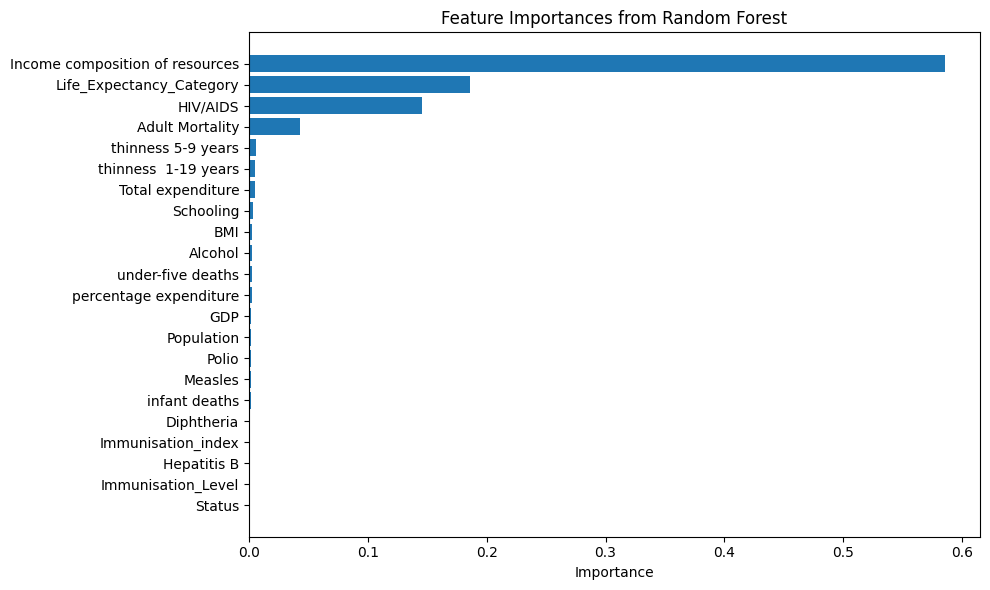

In [31]:
import pandas as pd

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importances from Random Forest")
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()


# **Task Related**
# Training the model without the enginnered features



In [32]:
df_model_1 = df.copy()

df_model_1 = df_model_1.drop(['Immunisation_index', 'Immunisation_Level','Life_Expectancy_Category'], axis=1)
# Drop columns that shouldn't be used as features
X = df_model_1.drop(columns=['Country', 'Year', 'Life expectancy'])  # Assume target is life expectancy
y = df_model_1['Life expectancy']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model_1 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model_1
print("Training the Random Forest Regressor...")
model_1.fit(X_train, y_train)
print(" Model training completed!")




Training the Random Forest Regressor...
 Model training completed!


In [33]:
# Model Evaluation - REGRESSION METRICS
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Make predictions
y_pred = model_1.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" MODEL PERFORMANCE (REGRESSION METRICS) ")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Model explains {r2*100:.2f}% of the variance in life expectancy")

# Show some predictions vs actual
print("\n SAMPLE PREDICTIONS ")
print("Actual vs Predicted (first 10 samples):")
for i in range(10):
    print(f"Actual: {y_test.iloc[i]:.2f}, Predicted: {y_pred[i]:.2f}, Difference: {abs(y_test.iloc[i] - y_pred[i]):.2f}")

 MODEL PERFORMANCE (REGRESSION METRICS) 
Mean Squared Error (MSE): 3.59
Root Mean Squared Error (RMSE): 1.90
Mean Absolute Error (MAE): 1.12
R² Score: 0.9494
Model explains 94.94% of the variance in life expectancy

 SAMPLE PREDICTIONS 
Actual vs Predicted (first 10 samples):
Actual: 67.50, Predicted: 69.82, Difference: 2.32
Actual: 73.80, Predicted: 73.92, Difference: 0.12
Actual: 79.10, Predicted: 79.80, Difference: 0.70
Actual: 54.90, Predicted: 53.94, Difference: 0.96
Actual: 48.60, Predicted: 51.36, Difference: 2.76
Actual: 50.00, Predicted: 50.31, Difference: 0.31
Actual: 68.70, Predicted: 69.29, Difference: 0.59
Actual: 74.10, Predicted: 74.08, Difference: 0.02
Actual: 76.90, Predicted: 76.77, Difference: 0.13
Actual: 72.40, Predicted: 72.91, Difference: 0.51


# Conclusion
The addition of engineered features  particularly the Immunisation Index  and LifeExpectancy_Category  improved model performance across all key regression metrics:
MAE dropped from 1.12 to 0.95 , predictions became more accurate.
R² increased from 94.94% to 96.47% ,the model now explains more variance in life expectancy.




# Recommendations and Conclusions

#### Insights and  Conclusions

* Countries aiming to improve national life expectancy should prioritize long term investment in education and equitable social development that is more income equity.Efforts should focus on expanding schooling access especially for vulnerable populations and ensuring that income and public resources are fairly distributed to support health, education, and welfare services.
* International aid and policy should support these pillars in developing countries to help close the life expectancy gap global especially education access at higher levels
* Governments and International Organisations  especially in developing the ones with low or medium vaccine coverage levels should strengthen and expand national immunisation programs. The strong correlation between vaccine coverage and longevity implies the need for universal access to childhood immunisations.
* Srategies to reduce HIV/AIDS prevalence  including education and sensitization, testing and access to antiretroviral therapy  should be intensified in countries affected.
* Governments of countries with high adult and infant mortality should invest in comprehensive healthcare systems that target both maternal/infant health and preventive health care for adults.
'


####  Recommendations for future work

* *Expand dataset*: Include more recent data (2015-upwards) to capture post COVID trends.
* *Add regional indicators* (continent, urbanization) to capture cultural or infrastructure effects and the state of the political atmosphere.
* *Explanations on features* Give more comprehensive explanations of what each features means like when dealing with infant mortality, adult mortality, HIV/AIDS what metric is being used is it x number of deaths or infections per 1000 people 
* *Model Deployment* Explore options for deploying the model in a production environment for realtime predictions.
* *Model Improvement* Explore more advanced machine learning models or deep learning techniques to improve prediction accuracy.
* *Environment Data* Blend satellite/environmental data  metrics like air quality to test environmental impacts.
* *Account for disasters* for such Civil wars or political instability to account for impacts on life expectancy.